In [9]:
import keras_NN as myNN
import tensorflow as tf
import pandas as pd
import warnings
import time
import os

warnings.filterwarnings("ignore")
os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

gpus = tf.config.list_physical_devices('GPU')
gpu = 1
if gpus:
    try:
        tf.config.set_visible_devices(gpus[gpu], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[gpu], True)
    except RuntimeError as e:
        print(e)

min_delta = 0.0001
patience = 5 # reduce LR 
factor = 0.5
dataset_size = "full"
verbose = 1

# phase 3
unfrozen_layers = 0
load_model = 'data/weights/20241116_211249.h5'
load_model = None

# phase 2
dropout = 0.5
batch_norm = True

# phase 1
max_epoch = 90

batch_size = 250
learning_rate = 1e-05

myNN.run_experiment(batch_size=batch_size, 
                    learning_rate=learning_rate, 
                    max_epoch=max_epoch,
                    patience=patience, 
                     min_delta=min_delta, 
                    dataset_size=dataset_size, 
                    seed=42, 
                    verbose=verbose, 
                    factor=factor, 
                    dropout=dropout, 
                    batch_norm=batch_norm,
                    unfrozen_layers=unfrozen_layers, 
                    load_model=load_model)

Found 40025 images belonging to 7 classes.
Found 4448 images belonging to 7 classes.
Found 4937 images belonging to 7 classes.
Epoch 1/90


2024-11-17 11:30:21.598778: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907
2024-11-17 11:30:21.684174: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-11-17 11:31:18.262681: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f7660023310 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-17 11:31:18.262746: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100-SXM4-80GB, Compute Capability 8.0
2024-11-17 11:31:18.297983: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-17 11:31:18.628944: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-11-17 11:31:18.708576: I ./tensorflow/compiler/jit/device_compil

161/161 [==============================] - 786s 4s/step - loss: 1.4952 - categorical_accuracy: 0.4879 - val_loss: 1.6238 - val_categorical_accuracy: 0.6623 - lr: 1.0000e-05
Epoch 2/90
161/161 [==============================] - 647s 4s/step - loss: 0.9651 - categorical_accuracy: 0.6729 - val_loss: 1.0709 - val_categorical_accuracy: 0.7161 - lr: 1.0000e-05
Epoch 3/90
161/161 [==============================] - 647s 4s/step - loss: 0.7813 - categorical_accuracy: 0.7396 - val_loss: 0.7122 - val_categorical_accuracy: 0.7599 - lr: 1.0000e-05
Epoch 4/90
161/161 [==============================] - 641s 4s/step - loss: 0.6628 - categorical_accuracy: 0.7773 - val_loss: 0.6204 - val_categorical_accuracy: 0.7902 - lr: 1.0000e-05
Epoch 5/90
161/161 [==============================] - 666s 4s/step - loss: 0.5549 - categorical_accuracy: 0.8139 - val_loss: 0.5349 - val_categorical_accuracy: 0.8249 - lr: 1.0000e-05
Epoch 6/90
161/161 [==============================] - 645s 4s/step - loss: 0.4699 - categor

In [2]:
import keras_NN as myNN
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import os

dropout = 0.3
batch_norm = True
learning_rate = 1e-05
batch_size = 250
max_epoch = 90
unfrozen_layers = 0

df = pd.DataFrame()

for filename in os.listdir("data/results"):
    if filename.endswith(".csv"):
        file_path = os.path.join("data/results", filename)
        temp_df = pd.read_csv(file_path)
        df = pd.concat([df, temp_df], ignore_index=True)

df.reset_index(drop=True, inplace=True)

weights_path = df[(df["dropout"] == dropout) & 
                  (df["batch_norm"] == batch_norm) & 
                  (df["test_accuracy"] > 0.8)]["weights_path"].values[0]

_, _, test_generator = myNN.create_generators(batch_size=batch_size, seed=42)

actuals = test_generator.classes
probs, preds = myNN.load_model_and_predict(x_test=test_generator,
                                            load_model_path=weights_path, 
                                            learning_rate=learning_rate, 
                                            unfrozen_layers=unfrozen_layers, 
                                            batch_norm=batch_norm, 
                                            dropout=dropout)

print("The preds have been saved.")

2024-11-18 22:33:17.770773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-18 22:33:18.776258: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPUs will likely run quickly with dtype policy mixed_float16 as they all have compute capability of at least 7.0
Found 40025 images belonging to 7 classes.
Found 4448 images belonging to 7 classes.
Found 4937 images belonging to 7 classes.


2024-11-18 22:33:24.134377: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 70709 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:07:00.0, compute capability: 8.0
2024-11-18 22:33:24.136612: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 77825 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:0f:00.0, compute capability: 8.0
2024-11-18 22:33:24.138550: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 77825 MB memory:  -> device: 2, name: NVIDIA A100-SXM4-80GB, pci bus id: 0000:47:00.0, compute capability: 8.0
2024-11-18 22:33:24.140491: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 77825 MB memory:  -> device: 3, name: NVIDIA A100-SXM4-80GB, pci bu

20/20 [==============================] - 81s 4s/step
The preds have been saved.


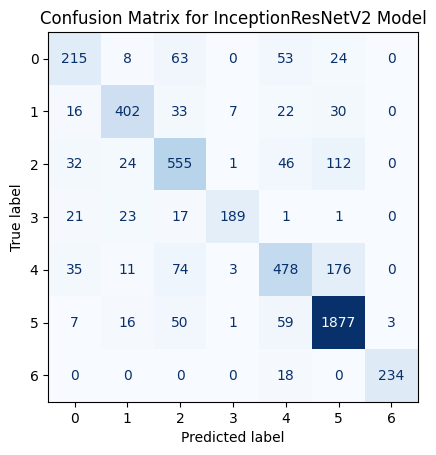

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(actuals, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', colorbar=False)
plt.title(f"Confusion Matrix for InceptionResNetV2 Model")
plt.savefig("plots/cm.png")

plt.show()